## Pre processing

In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import files
files.upload()

Saving cars.csv to cars.csv


{'cars.csv': b'mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand\r\n14,8,350,165,4209,12,1972, US.\r\n31.9,4,89,71,1925,14,1980, Europe.\r\n17,8,302,140,3449,11,1971, US.\r\n15,8,400,150,3761,10,1971, US.\r\n30.5,4,98,63,2051,17,1978, US.\r\n23,8,350,125,3900,17,1980, US.\r\n13,8,351,158,4363,13,1974, US.\r\n14,8,440,215,4312,9,1971, US.\r\n25.4,5,183,77,3530,20,1980, Europe.\r\n37.7,4,89,62,2050,17,1982, Japan.\r\n34,4,108,70,2245,17,1983, Japan.\r\n34.3,4,97,78,2188,16,1981, Europe.\r\n16,8,302,140,4141,14,1975, US.\r\n11,8,350,180,3664,11,1974, US.\r\n19.1,6,225,90, ,19,1981, US.\r\n16.9,8,350,155,4360,15,1980, US.\r\n31.8,4,85,65,2020,19,1980, Japan.\r\n16,8,304,150,3433,12,1971, US.\r\n24,4,113,95,2278,16,1973, Japan.\r\n24,4,107,90,2430,15,1971, Europe.\r\n37.2,4,86,65,2019,16,1981, Japan.\r\n21.5,4,121,110,2600,13,1978, Europe.\r\n24,6,200,81,3012,18,1977, US.\r\n15.5,8,351,142,4054,14,1980, US.\r\n38.1,4,89,60,1968,19,1981, Japan.\r\n33,4,91,53,1795,17,1977, Japan.\r

In [165]:
dataset = pd.read_csv('cars.csv')
dataset.shape

(261, 8)

In [166]:
dataset.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [167]:
# verify if there is null values
dataset.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9262618c18>,
      dtype=object)

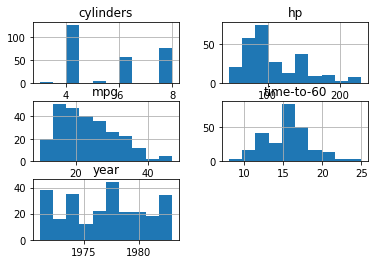

In [168]:
dataset.hist()

In [169]:
dataset.describe()

,mpg,cylinders,hp,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,106.360153,15.547893,1976.819923
std,7.823570,1.733310,40.499959,2.910625,3.637696
min,10.000000,3.000000,46.000000,8.000000,1971.000000
25%,16.900000,4.000000,75.000000,14.000000,1974.000000
50%,22.000000,6.000000,95.000000,16.000000,1977.000000
75%,28.800000,8.000000,138.000000,17.000000,1980.000000
max,46.600000,8.000000,230.000000,25.000000,1983.000000


In [170]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [171]:
x_values = dataset.iloc[:, 0: len(dataset.columns) - 1]
y_values = dataset.iloc[:, -1]

In [172]:
print(x_values.shape)
print(y_values.shape)
print(type(x_values))
print(type(y_values))

(261, 7)
(261,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [173]:
x_values.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350,165,4209,12,1972
1,31.9,4,89,71,1925,14,1980
2,17.0,8,302,140,3449,11,1971
3,15.0,8,400,150,3761,10,1971
4,30.5,4,98,63,2051,17,1978


In [174]:
y_values.head()

0         US.
1     Europe.
2         US.
3         US.
4         US.
Name: brand, dtype: object

In [175]:
# values unique of y values
y_values.unique()

array([' US.', ' Europe.', ' Japan.'], dtype=object)

In [176]:
# appy LabelEncode
encode_inst = LabelEncoder()
x_values['cubicinches'] = encode_inst.fit_transform(x_values['cubicinches'])
x_values['weightlbs'] = encode_inst.fit_transform(x_values['weightlbs'])

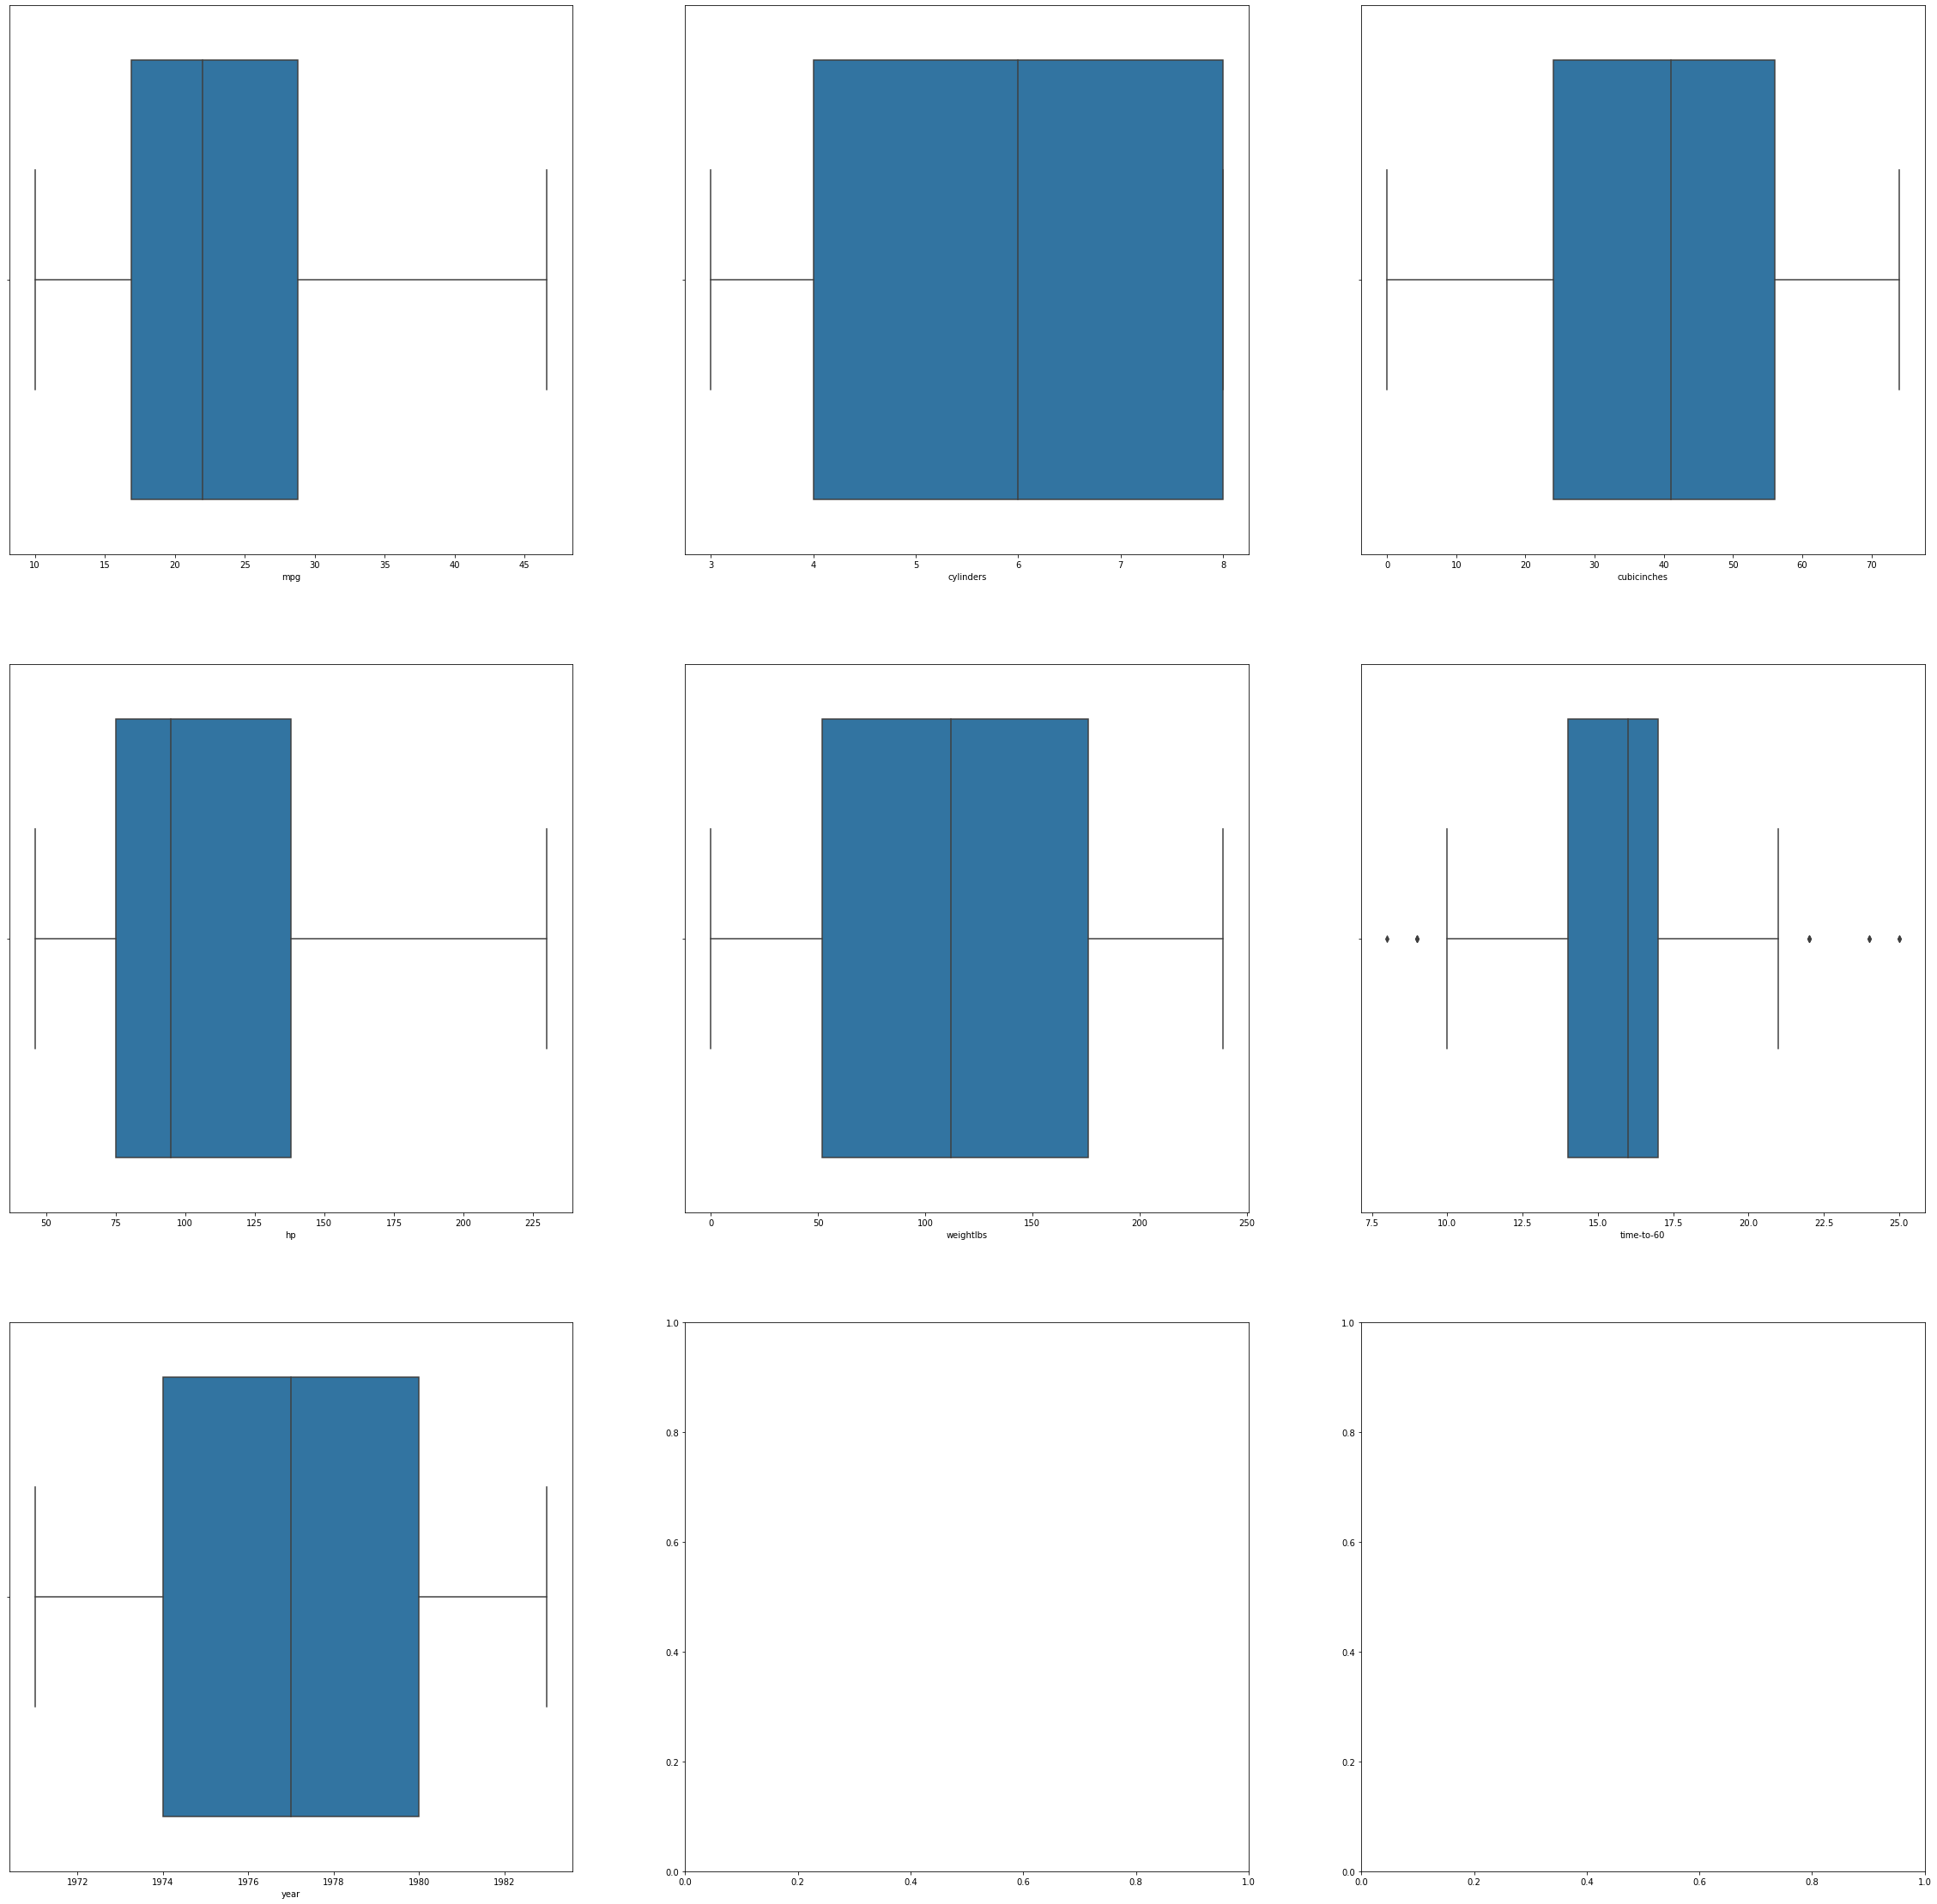

In [177]:
f, axes = plt.subplots(3, 3, figsize=(40, 40))
count = 0
i = 0

for index, column in enumerate(x_values.columns):
  sns.boxplot(x=column, data=x_values, ax=axes[i][count])
  count += 1
  if (index + 1) % 3 == 0:
    count = 0
    i += 1

In [178]:
# normalize the data
from  sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_values = scaler.fit_transform(x_values)

In [179]:
x_values = pd.DataFrame(scaled_values, index=x_values.index, columns=x_values.columns)

In [180]:
# x_values

## Reduce dimension number of features

In [181]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
reduce_dim = pca.fit_transform(scaled_values)

x_values = pd.DataFrame(reduce_dim, index=x_values.index, columns=x_values.columns)

In [182]:
x_values.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,-3.165999,0.596007,0.231911,-0.103583,0.243114,-0.050876,-0.126537
1,2.026462,1.175314,-0.941422,-1.062195,-0.483957,-0.069997,-0.028706
2,-2.618892,0.663537,0.617330,-0.697750,0.244883,-0.701350,-0.107783
3,-3.074908,1.060641,0.347905,-0.763187,0.036877,-0.455435,-0.287585
4,2.174241,1.459577,-0.379331,-0.016169,-0.326837,0.019361,-0.063813


## Clustering

In [191]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
model_kmeans = kmeans.fit_predict(x_values)

In [192]:
print(model_kmeans)

[0 2 0 0 2 0 0 0 1 2 1 2 0 0 1 0 2 0 1 1 2 1 1 0 2 2 2 0 1 2 2 1 1 1 2 1 2
 2 0 1 1 0 1 1 0 1 0 1 2 1 0 1 0 1 0 0 1 2 2 0 1 1 1 2 0 1 2 2 2 0 1 1 2 1
 2 1 1 1 2 1 0 0 0 1 1 2 1 1 2 1 2 1 0 1 2 1 0 1 0 1 0 0 2 1 1 1 2 2 1 0 2
 1 0 2 2 1 1 1 2 0 1 2 0 1 2 1 0 1 1 2 2 1 0 0 0 0 2 0 1 1 1 2 1 2 0 1 1 1
 0 0 1 1 0 1 1 1 2 2 1 1 1 0 1 1 2 1 1 1 1 1 1 1 2 1 1 2 0 0 0 2 1 2 0 0 1
 1 1 0 0 0 1 1 0 0 0 2 1 2 2 2 1 1 1 1 1 0 2 1 0 1 1 0 2 2 1 1 2 0 1 0 1 1
 0 1 0 2 0 2 1 1 0 1 1 0 1 2 0 1 2 1 0 1 0 1 0 0 0 2 2 1 2 1 1 0 1 1 0 2 1
 1 1]


In [193]:
encode_y = LabelEncoder()
label_encoder_y = encode_y.fit_transform(y_values)
print(label_encoder_y)

[2 0 2 2 2 2 2 2 0 1 1 0 2 2 2 2 1 2 1 0 1 0 2 2 1 1 1 2 2 2 1 2 1 2 1 2 0
 1 2 2 2 2 2 2 2 1 2 2 0 2 2 0 2 0 2 2 1 2 0 2 2 1 1 1 2 2 0 1 0 2 2 2 1 1
 0 2 2 1 0 1 2 2 2 0 0 1 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 0 0 0 2 1
 0 2 1 0 2 2 2 2 2 0 0 2 2 0 2 2 2 0 2 0 2 2 2 2 2 2 2 0 0 2 1 1 1 2 0 2 2
 2 2 1 1 2 2 0 2 1 1 2 0 2 2 2 2 0 2 2 2 1 2 1 0 0 2 2 0 2 2 2 1 2 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 2 0 0 1 0 2 2 2 2 2 1 2 2 1 1 2 1 0 2 1 1 2 2 2 2 0
 2 0 2 1 2 1 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 0 2 2 2 0 1 2 2 0 0 2 2 1 2 1 2
 2 2]
